In [1]:
import pandas as pd

In [2]:
import numpy as np

In [6]:
# Generate sample data
np.random.seed(42)

data = {
    'study_hours': np.random.randint(1, 10, 100),
    'attendance': np.random.randint(60, 100, 100),
    'previous_score': np.random.randint(30, 100, 100),
}

df = pd.DataFrame(data)

# Create the target variable
df['passed'] = np.where((df['study_hours'] > 3) &
                        (df['attendance'] > 70) &
                        (df['previous_score'] > 40), 1, 0)

df.head()


,study_hours,attendance,previous_score,passed
0,7,94,48,1
1,4,96,49,1
2,8,73,81,1
3,5,62,62,0
4,7,60,69,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Dataset shape: (100, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   study_hours     100 non-null    int32
 1   attendance      100 non-null    int32
 2   previous_score  100 non-null    int32
 3   passed          100 non-null    int64
dtypes: int32(3), int64(1)
memory usage: 2.1 KB
None

Summary stats:
       study_hours  attendance  previous_score      passed
count   100.000000  100.000000      100.000000  100.000000
mean      5.320000   79.500000       64.530000    0.410000
std       2.639559   12.385638       18.989872    0.494311
min       1.000000   60.000000       30.000000    0.000000
25%       3.000000   68.000000       49.750000    0.000000
50%       5.000000   81.500000       62.000000    0.000000
75%       8.000000   91.000000       79.250000    1.000000
max       9.000000   98.000000       98.000000    1.000000

Value c

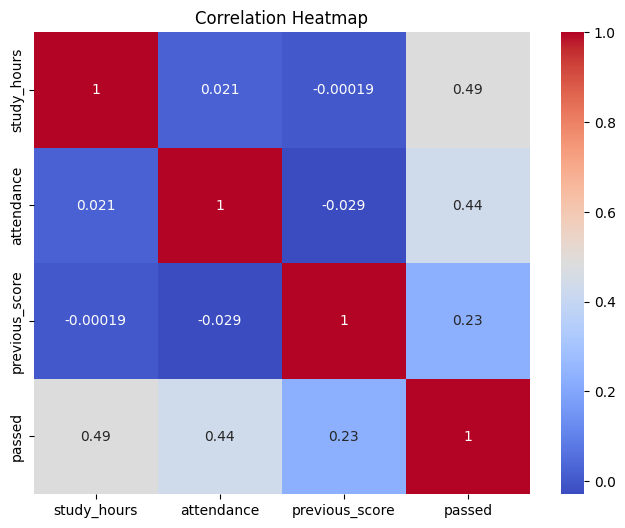

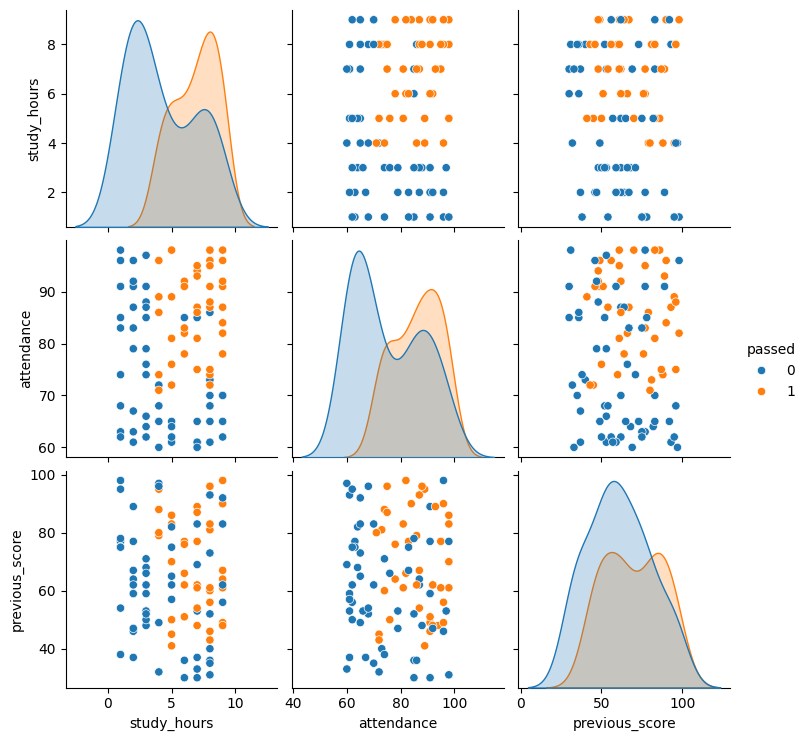

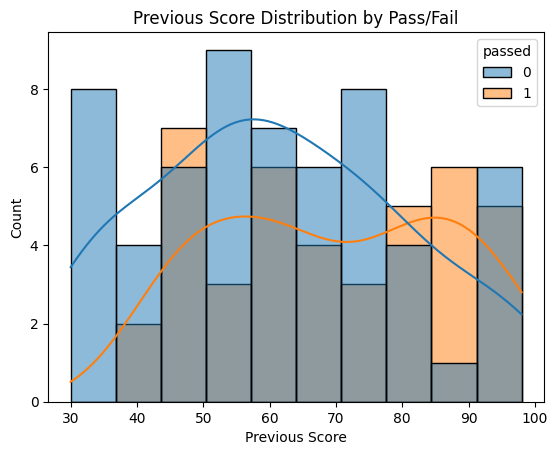

In [19]:
# 1. Shape of the dataset
print("Dataset shape:", df.shape)

# 2. Basic info
print("\nInfo:")
print(df.info())

# 3. Statistical summary
print("\nSummary stats:")
print(df.describe())

# 4. Count how many passed vs not
print("\nValue counts:")
print(df['passed'].value_counts())

# 5. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 6. Visualize feature vs target
sns.pairplot(df, hue="passed")
plt.show()

# 7. Histogram visaulization
sns.histplot(data=df, x='previous_score', hue='passed', kde=True, bins=10)
plt.title("Previous Score Distribution by Pass/Fail")
plt.xlabel("Previous Score")
plt.ylabel("Count")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [23]:
# 1. Define features and target
X = df[['study_hours', 'attendance', 'previous_score']]
y = df['passed']

# 2. Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9

Confusion Matrix:
 [[12  1]
 [ 1  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.86      0.86      0.86         7

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20

